In [1]:
%pylab inline
import seaborn as sns
import pandas as pd
import glob
import numpy as np
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_together/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# PLot validation of each optimal allele in a period together

def main():
    print('Running main')
    means = [10**-5, 10**-4, 10**-3, 10**-2] 
    pers = [2,3,4] 
    opt_dic = {}
    opt_dic[2] = [11,20] #,14,17,
    opt_dic[3] = [5,13] #,6,7,8,10,
    opt_dic[4] = [7,10] #,8,9,
    folder = 't36'
    fig_num = 0
    
    ab_pairs = []
    dic = {}
    dic['Period, Optimal allele'] = []
    dic['Ground truth a,b'] = []
    dic['s values'] = []
    dic['Fraction of loci'] = []
    for per in pers:
    
        for opt in opt_dic[per]:
            print('Running period %d opt %d'%(per,opt))

            for mean in means:
                
                for j in range(0,3):

                    file_list = glob.glob('./results/validation_multiple_one_opt/%s/per_%d_opt_%d_*_%.5f.txt'%(folder, per, opt, mean)) 
                    file_list.sort()
                       
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    line = lines[6]       
                    info = line.strip().split(': ')
                    params = info[1]
                    params = params.strip().split('), ')
                    
                    params_list = []
                    for param in params:
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        params_list.append(((float(param[1])), float(param[2])))
                    
                    line = lines[1]
                    info = line.strip().split(' ')
                    
                    k = float(info[7])
                    theta = float(info[10])
                    
                    if (k, theta) not in ab_pairs:
                        ab_pairs.append((k,theta))
                    
                    for param in params_list:
                        svals = GetGammaBins(param[0], param[1])
                        combos = [('0<=s<10^-4',svals[0]),('10^-4<=s<10^-3',svals[1]),('10^-3<=s<10^-2',svals[2]),('s>=10^-2',svals[3])]
                        for combo in combos:
                            dic['Period, Optimal allele'].append('Per %d Opt %d'%(per, opt))
                            dic['Ground truth a,b'].append('(%.1E,%.1E)'%(k,theta))
                            dic['s values'].append(combo[0])
                            dic['Fraction of loci'].append(combo[1])
                            
    df = pd.DataFrame(data=dic)
    
    for ab_pair in ab_pairs:
        k = ab_pair[0]
        theta = ab_pair[1]
        sub_df = df.loc[df['Ground truth a,b'] == '(%.1E,%.1E)'%(k,theta)]
       
        # Plot beeswarm plot
        fig_num = fig_num + 1
        plt.figure(fig_num) #, figsize=(12, 6)
        sns.swarmplot(x="s values", y="Fraction of loci", hue="Period, Optimal allele", data=sub_df)
        
        plt.ylim(-0.1, 1.1)
        mean_s = k*theta
        if mean_s < 10**-5:
            mean_s = 10**-5
        plt.title('Joint method validation \n a = %.1E, b = %.1E, mean s = %.1E'%(k,theta,mean_s))
        svals =  GetGammaBins(k, theta)
        plt.plot(0, svals[0], marker='*', markersize=20, c = 'black', zorder=10) 
        plt.plot(1, svals[1], marker='*', markersize=20, c = 'black', zorder=10) 
        plt.plot(2, svals[2], marker='*', markersize=20, c = 'black', zorder=10) 
        plt.plot(3, svals[3], marker='*', markersize=20, c = 'black', zorder=10)
        plt.xticks(rotation = 15)

Running main
Running period 2 opt 11
Running period 2 opt 20
Running period 3 opt 5
Running period 3 opt 13
Running period 4 opt 7
Running period 4 opt 10
CPU times: user 2min, sys: 193 ms, total: 2min
Wall time: 2min


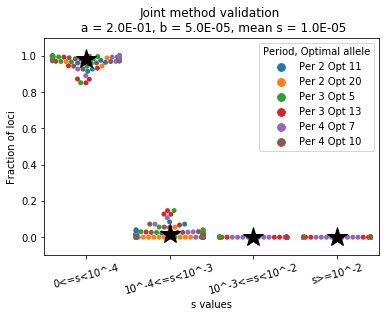

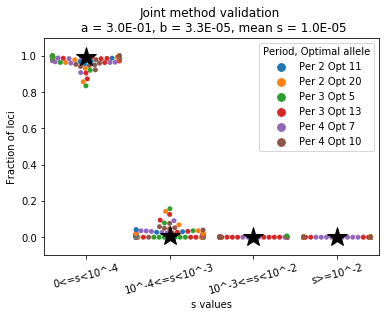

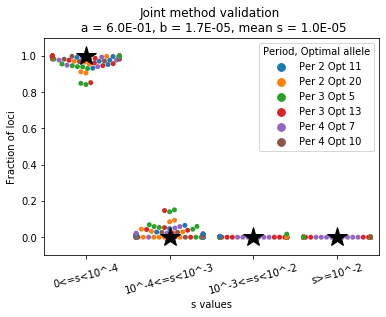

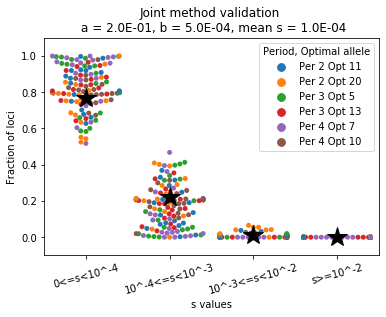

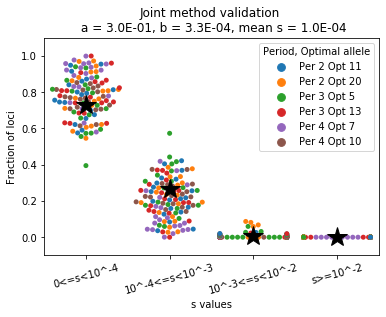

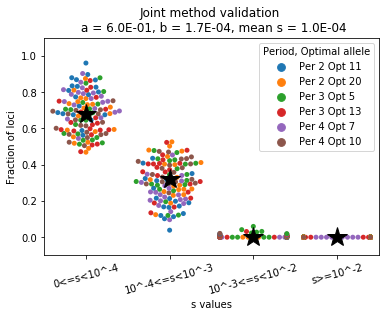

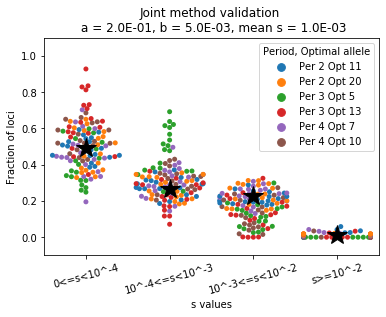

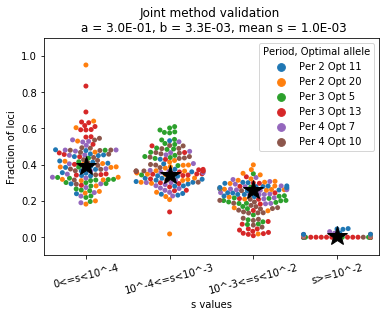

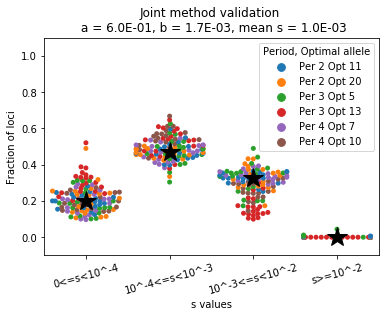

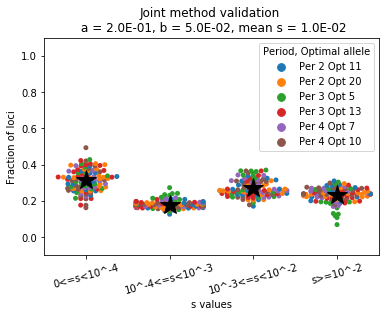

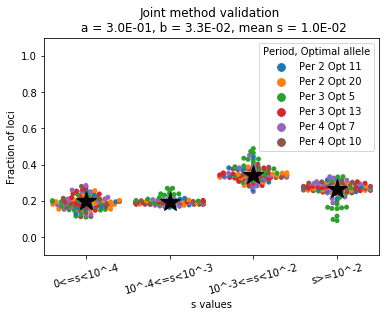

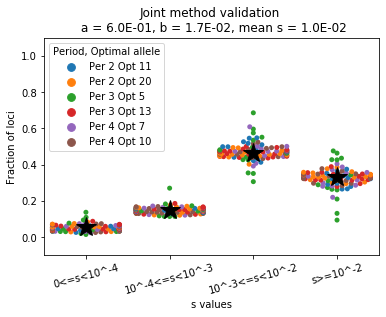

In [3]:
%%time
if __name__ == '__main__':
    main()